In [182]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [183]:
#volvemos a cargar los dos dataframes
df_activity = pd.read_csv("../files/customer_flight_activity.csv")
df_loyalty = pd.read_csv("../files/customer_loyalty_history.csv")

## Eliminamos duplicados y columnas sin sentido

In [184]:
#lo primero que haremos será encargarnos de las filas duplicadas que teníamos en nuestro df de actividad
#estas filas contienen exactamente la misma información en cada una de sus columnas y sólo muestran información redundante. 
#Puesto que se trata de la misma persona (con el mismo número de identificación 'loyalty number'), podemos eliminarlas. Lo más probable es que sean errores cometidos al introducir los datos. 

df_activity.drop_duplicates (inplace = True)

In [185]:
#vamos a eliminar también la columna de country, que dijimos que contenía un único tipo de dato 'Canadá'. Esto es así porque se trata de una empresa canadiense y todos sus viajeros pertenecen a Canadá. 
df_loyalty.drop ('Country', axis=1, inplace= True)

In [186]:
#comprobamos que se han eliminado las filas duplicadas. En un principio teníamos 405.624 y hemos borrado 1864. 
print (f' nos quedan {df_activity.shape[0]} filas en nuestro df')

 nos quedan 403760 filas en nuestro df


In [187]:
#recordemos que tenemos la columna salary con valores negativos. Al no ser muchos (sólo 20), lo tomaremos como un error y los cambiaremos a +
df_loyalty [df_loyalty ['Salary'] < 0]

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


In [188]:
#utilizando el método abs() de pandas, cambiamos los valores negativos a positivos
df_loyalty['Salary'] = df_loyalty['Salary'].abs()

In [189]:
#comprobamos que no tengamos valores negativos
df_loyalty [df_loyalty ['Salary'] < 0]


,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


## Unimos los dataframes

Ahora que hemos solucionado el problema de las filas y columnas con información redundante, vamos a unir los dos dataframes. 
Se trata de dos dataframes que contienen información sobre viajeros de diferentes aerolineas. El df_loyalty nos indica datos personales sobre el viajero (dirección, género, estado civil... ). El otro df contiene información sobre sus viajes realizados, reservados, puntos acumulados por vuelos, distancia recorrida, etc...
Nos interesa tener un único dataframe que contenga los datos de cada viajero con todos sus viajes. Por lo tanto, haremos la union mediant un left join. 

In [190]:
df = df_activity.merge( right=df_loyalty, how='left',
                        left_on='Loyalty Number', right_on='Loyalty Number')
df


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


## homogeneizamos el nombre de las columnas

In [191]:
# vamos a iterar por todas las columnas del DataFrame y a cada una de ellas la pondremos en minúsula y le aplicaremos un replace para unir las palabras mediante un guión. 
nuevas_columnas = {columna: columna.lower().replace(" ", "_") for columna in df.columns}

# comprobamos que hemos creado el diccionario correctamente
nuevas_columnas

{'Loyalty Number': 'loyalty_number',
 'Year': 'year',
 'Month': 'month',
 'Flights Booked': 'flights_booked',
 'Flights with Companions': 'flights_with_companions',
 'Total Flights': 'total_flights',
 'Distance': 'distance',
 'Points Accumulated': 'points_accumulated',
 'Points Redeemed': 'points_redeemed',
 'Dollar Cost Points Redeemed': 'dollar_cost_points_redeemed',
 'Province': 'province',
 'City': 'city',
 'Postal Code': 'postal_code',
 'Gender': 'gender',
 'Education': 'education',
 'Salary': 'salary',
 'Marital Status': 'marital_status',
 'Loyalty Card': 'loyalty_card',
 'CLV': 'clv',
 'Enrollment Type': 'enrollment_type',
 'Enrollment Year': 'enrollment_year',
 'Enrollment Month': 'enrollment_month',
 'Cancellation Year': 'cancellation_year',
 'Cancellation Month': 'cancellation_month'}

In [192]:
# una vez que tenemos el diccionario vamos a aplicar el método rename
df.rename(columns = nuevas_columnas, inplace = True)

# comprobamos que se han cambiado los nombres de las columnas
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


## homogeneizamos los valores de las columnas 

In [193]:
def homogeneizar(cadena):
    """
    Convierte una cadena para que todas sus letras estén en minúsulas y reemplaza espacios por guiones
    """
    return cadena.lower().replace(' ', '_')

In [194]:
lista_cambios = ['province', 'city', 'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card', 'enrollment_type' ] 

In [195]:
# hemos hecho el cambio para una de las columnas, pero recordad que había dos columnas más que tenían este formato incorrecto
# vamos a crear una lista con los nombres de las columnas que queremos cambiar


# iteramos por la lista de columnas y a cada una de ellas le aplicamos la función que hemos creado con un '.apply()'
for col in lista_cambios:
    df[col] = df[col].apply(homogeneizar)

In [196]:
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,british_columbia,dawson_creek,u5i_4f1,female,college,NaN,divorced,nova,2838.07,standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,british_columbia,vancouver,v5r_1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,ontario,toronto,p1l_8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,1,NaN,NaN


In [197]:
# la columna 'month' aparece como una variable numérica, pero es posible que para posteriores estudios nos sea más útil transformarla en una variable categórica que nos muestra los meses del año
# Definimos el diccionario de mapeo
meses_dict = {
    1: 'january',
    2: 'february',
    3: 'march',
    4: 'april',
    5: 'may',
    6: 'june',
    7: 'july',
    8: 'august',
    9: 'september',
    10: 'october',
    11: 'november',
    12: 'december'
}

# Aplicar el mapeo a la columna del DataFrame
df['month'] = df['month'].map(meses_dict)


In [198]:
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,january,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8,NaN,NaN
1,100102,2017,january,10,4,14,2030,203.0,0,0,ontario,toronto,m1r_4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN
2,100140,2017,january,6,0,6,1200,120.0,0,0,british_columbia,dawson_creek,u5i_4f1,female,college,NaN,divorced,nova,2838.07,standard,2016,7,NaN,NaN
3,100214,2017,january,0,0,0,0,0.0,0,0,british_columbia,vancouver,v5r_1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,8,NaN,NaN
4,100272,2017,january,0,0,0,0,0.0,0,0,ontario,toronto,p1l_8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,1,NaN,NaN


## Gestión de valores nulos

In [199]:
# importamos las librerías para la imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
#volvemos a revisar los valores nulos
df.isnull().sum()

loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102260
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              354110
cancellation_month             354110
dtype: int64

In [201]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(df.isna().sum()/df.shape[0]*100, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]
#podemos ver que hay dos columnas que tienen un elevado porcentaje de nulos (casi un 90%). Más adelante veremos cómo lo gestionaremos.

,%_nulos
salary,25.326927
cancellation_year,87.703091
cancellation_month,87.703091


Las columnas 'cancellation_year' y 'cancellation_month' tienen un porcentaje de nulos que ronda el 90%. 
Probablemente indiquen que no ha habido cancelación por el momento, por eso aparecen sin datos. 
Vamos a rellenar esos nulos con 'No cancelado', para no tener valores nulos en nuestro DF.

In [202]:
df['cancellation_year'] = df['cancellation_year'].fillna("not_cancelled")

In [203]:
df['cancellation_month'] = df['cancellation_month'].fillna("not_cancelled")

Veamos qué hacer con la columna 'salary': La cantidad de valores faltantes es relativamente grande (25%). En primer lugar vamos a visulizar la distribución de los datos mediante un gráfico para ver si hay valores atípicos o outliers. 

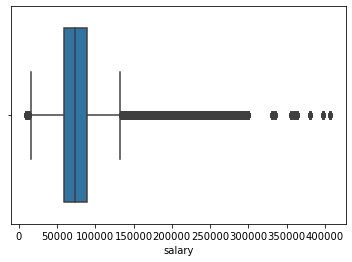

In [204]:
#vamos a ver cómo gestionamos los nulos de la columna salary:

sns.boxplot(x = 'salary', data = df);

Explorando los datos, nos encontramos con que, curiosamente, todos los datos de 'salary' nulos coinciden con el nivel educativo 'college':

In [205]:
df_college = df[df['education'] == 'college']

In [206]:
len(df_college['salary'])

102260

In [207]:
df_college['salary'].unique()
#comprobamos que tiene un único valor y que la cantidad de nulos (102260) son todos los nulos que vimos al comienzo. 
#Esto supone un problema a la hora de la imputación, y nos hace plantearnos cuál será el mejor método para realizar la imputación. 
#En Canadá, el nivel educativo que equivale a "college" sería el equivalente a la FP que tenemos en España. 
#A falta de tener unos datos más completos, optamos por realizar un análisis y aplicar los métodos KnnImputer o IterativImputer, pero debemos tener en cuenta que los resultados que obtengamos acerca de esta categoría no serán muy fiables. 

array([nan])

Observamos valores atípicos (valores que están por fuera de los bigotes del boxplot) por lo que optaremos por reemplazar los nulos con métodos avanzados como KNNImputer y IterativeImputer.

In [208]:
# como vamos a crear columnas nuevas, vamos a hacer una copia del DataFrame usando el método 'copy()'
df_copia = df.copy()
df_copia.head(1)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,january,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,not_cancelled,not_cancelled


In [209]:
#vamos a comparar los dos métodos para valorar cuál de ellos es más conveniente. Empezaremos por el IterativeImputer
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["salary"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[92552.        ],
       [79371.73290216],
       [79371.73290216],
       ...,
       [47670.        ],
       [79371.73290216],
       [46594.        ]])

In [210]:
# en este caso como vamos a aplicar los dos métodos sobre esta columna vamos a crear dos columnas nuevas
df_copia[["salary_iterative"]] = imputer_iterative_imputado

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia[['salary_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
salary_iterative    0
dtype: int64 nulos


In [211]:
# hagamos ahora lo mismo con el KNNImputer.

# instanciamos la clase del KNNImputer
#imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
#imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["salary"]])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
#imputer_knn_imputado

In [212]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
#df_copia[["salary_knn"]] = imputer_knn_imputado


# comprobamos los nulos
#print(f"Después del 'KNN' tenemos: \n{df_copia[['salary_knn']].isnull().sum()} nulos")

Solo nos queda comparar cual de los dos métodos se ajusta mejor a los datos. Para eso lo que haremos será trabajar desde el 'describe()'  para ver si los estadísticos antes y después de la inputación no han cambiado mucho. Finalmente nos quedaremos con aquel método que modifique los estadísticos menos. 

In [213]:
#df_copia.describe()[['salary', 'salary_knn', 'salary_iterative']]
#debido a que el método knnImputer tarda mucho en ejecutarse, lo dejamos comentado para no ejecutarlo más veces

In [214]:
#ambas columnas nos dan prácticamente los mismo valores, así que podemos quedarnos con cualquiera de los métodos. Nos quedaremos con el iterative. 
# Vamos a eliminar las columnas que ya no nos interesan para guardar el DataFrame limpio y sin valores nulos, para poder utilizarlo en nuestro análisis.
# eliminamos 'salary' que tenía los valores nulos y salary_knn.

df_copia.drop(['salary', 'salary_knn'], axis = 1, inplace = True)

In [215]:

# ahora vamos a cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre de origen
nuevo_nombre = {"salary_iterative": "salary"}
df_copia.rename(columns = nuevo_nombre, inplace = True)

In [216]:
df_copia.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
0,100018,2017,january,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,married,aurora,7919.20,standard,2016,8,not_cancelled,not_cancelled,92552.000000
1,100102,2017,january,10,4,14,2030,203.0,0,0,ontario,toronto,m1r_4k3,male,college,single,nova,2887.74,standard,2013,3,not_cancelled,not_cancelled,79371.732902
2,100140,2017,january,6,0,6,1200,120.0,0,0,british_columbia,dawson_creek,u5i_4f1,female,college,divorced,nova,2838.07,standard,2016,7,not_cancelled,not_cancelled,79371.732902
3,100214,2017,january,0,0,0,0,0.0,0,0,british_columbia,vancouver,v5r_1w3,male,bachelor,married,star,4170.57,standard,2015,8,not_cancelled,not_cancelled,63253.000000
4,100272,2017,january,0,0,0,0,0.0,0,0,ontario,toronto,p1l_8x8,female,bachelor,divorced,star,6622.05,standard,2014,1,not_cancelled,not_cancelled,91163.000000


In [217]:
#nos ha quedado una columna con muchos decimales, vamos a redondear y lo convertimos a integer con el método astype()
df_copia['salary']= df_copia['salary'].astype(int)

In [218]:
df_copia.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
0,100018,2017,january,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,married,aurora,7919.20,standard,2016,8,not_cancelled,not_cancelled,92552
1,100102,2017,january,10,4,14,2030,203.0,0,0,ontario,toronto,m1r_4k3,male,college,single,nova,2887.74,standard,2013,3,not_cancelled,not_cancelled,79371
2,100140,2017,january,6,0,6,1200,120.0,0,0,british_columbia,dawson_creek,u5i_4f1,female,college,divorced,nova,2838.07,standard,2016,7,not_cancelled,not_cancelled,79371
3,100214,2017,january,0,0,0,0,0.0,0,0,british_columbia,vancouver,v5r_1w3,male,bachelor,married,star,4170.57,standard,2015,8,not_cancelled,not_cancelled,63253
4,100272,2017,january,0,0,0,0,0.0,0,0,ontario,toronto,p1l_8x8,female,bachelor,divorced,star,6622.05,standard,2014,1,not_cancelled,not_cancelled,91163


In [219]:
df_copia.isnull().sum()

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
province                       0
city                           0
postal_code                    0
gender                         0
education                      0
marital_status                 0
loyalty_card                   0
clv                            0
enrollment_type                0
enrollment_year                0
enrollment_month               0
cancellation_year              0
cancellation_month             0
salary                         0
dtype: int64

Ahora tenemos un dataframe limpio y homogéneo que podemos utilizar para realizar cualquier tipo de análisis. Lo guardamos para poder trabajar con él en los siguientes pasos utilizando pandas.

In [220]:
df_copia.to_csv ('../files/flights.csv')


In [221]:
df_copia

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
0,100018,2017,january,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,married,aurora,7919.20,standard,2016,8,not_cancelled,not_cancelled,92552
1,100102,2017,january,10,4,14,2030,203.0,0,0,ontario,toronto,m1r_4k3,male,college,single,nova,2887.74,standard,2013,3,not_cancelled,not_cancelled,79371
2,100140,2017,january,6,0,6,1200,120.0,0,0,british_columbia,dawson_creek,u5i_4f1,female,college,divorced,nova,2838.07,standard,2016,7,not_cancelled,not_cancelled,79371
3,100214,2017,january,0,0,0,0,0.0,0,0,british_columbia,vancouver,v5r_1w3,male,bachelor,married,star,4170.57,standard,2015,8,not_cancelled,not_cancelled,63253
4,100272,2017,january,0,0,0,0,0.0,0,0,ontario,toronto,p1l_8x8,female,bachelor,divorced,star,6622.05,standard,2014,1,not_cancelled,not_cancelled,91163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,december,0,0,0,0,0.0,0,0,ontario,toronto,m1r_4k3,male,college,married,aurora,7290.07,standard,2014,5,not_cancelled,not_cancelled,79371
403756,999911,2018,december,0,0,0,0,0.0,0,0,newfoundland,st._john's,a1c_6h9,male,doctor,single,nova,8564.77,standard,2012,8,not_cancelled,not_cancelled,217943
403757,999940,2018,december,3,0,3,1233,123.0,0,0,quebec,quebec_city,g1b_3l5,female,bachelor,married,nova,20266.50,standard,2017,7,not_cancelled,not_cancelled,47670
403758,999982,2018,december,0,0,0,0,0.0,0,0,british_columbia,victoria,v10_6t5,male,college,married,star,2631.56,standard,2018,7,not_cancelled,not_cancelled,79371
